## Ball in a Box

Use Euler's algorithm to solve the ODEs representing the motion of a ball in a box. Discussion of this problem is found on pages 36 anfd 37 of Gould. *Warning* Gould spends most of Chapter 2 trying to teach the student to object oriented programming and Java. We are not interested in that in this class. You can ignore those portions and look forward to later chapters that do less in this regard.

This unit is directed at two difficulties students have in this class:

1. writing ODEs of several variables. Too many examples are one variable. Here, we *independently* evolve equations for $x$ and $y$ coordinates while keeping track of the velocity components $v_x$ and $v_y$.
2. animation of output is a powerful way of troubleshooting many of the assignments in this class, yet, implementation has always been a bugaboo. Here, we start on getting some animation in our output.

#### Algorithm  
Understanding that the $x$ and $y$ components can be treated independently is expressed by independent equations for the $x$ and $y$ coordinates. The result of applying Euler's algorithm to the equations

$$\frac{dx}{dt} = v_x$$
$$\frac{dy}{dt} = v_y$$

and done on the board is:

$$x(t+\Delta t) = x(t) + v_x(t) \Delta t$$
$$y(t+\Delta t) = y(t) - v_y(t) \Delta t$$

The basis for applying the algorithm is:

1. update positions using Euler's algoritm. 
2. check to see if the ball has exited the box. Let's say the box goes from -1 to 1 in both $x$ and $y$ directions. If it leaves the box in the $x$ direction then flip the sign of $v_y$. If it leaves inthe $y$ direction, flip the sign of $v_x$.
3. make updates to the display.

#### Implementation
The second problem involves getting the updates to occur in conjuntion with animation. This an be done using matplotlibs `animation` class, but is a little tricky. The problem of dynamically updating simulation results occurs frequently in this class, so I am trying to get students to learn the technique early. Below is a simple sketch of the concept. While this works, it still leaves something to be desired. I'll continue to work on this and pass tips along to you.


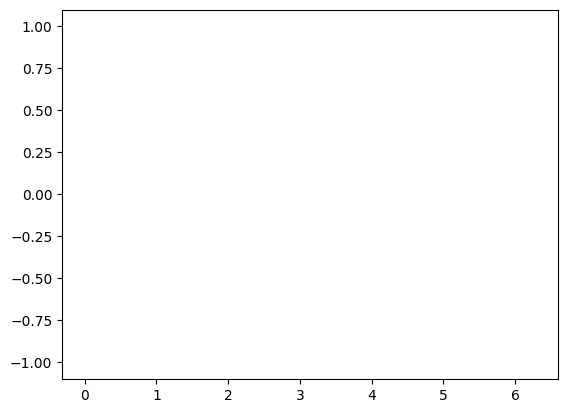

In [14]:
import matplotlib.pyplot as plt
import matplotlib.animation
from matplotlib import rc
import numpy as np

# equivalent to rcParams['animation.html'] = 'html5'
# This line sets the stage for animation.
rc('animation', html='html5')

# A simple function to animate
# note the linspace function. Useful!
t = np.linspace(0,2*np.pi,50)
x = np.sin(t)

# Create a figure ,fig of a simple axes running from -1 to 1 in y.
# Retain the axis handle, ax, and the plot handle, l
# for later use in creating the plot (axis handle) and
# manupulating contents (plot handle).
fig, ax = plt.subplots()
l, = ax.plot([0,2*np.pi],[-1,1])

# This is the function that performs the animation. In this case all it does is
# move the coordinates of the point being plotted, while maintaining the history
# with the indexing [:i]
animate = lambda i: l.set_data(t[:i], x[:i])

# Create the animation object that includes the callback function animate, the figure handle fig
# and the number of frames to show.
# side effect - this creates an empty axes.
ani = matplotlib.animation.FuncAnimation(fig, animate, frames=len(t));

# create the animation by 'displaying' the object
ani

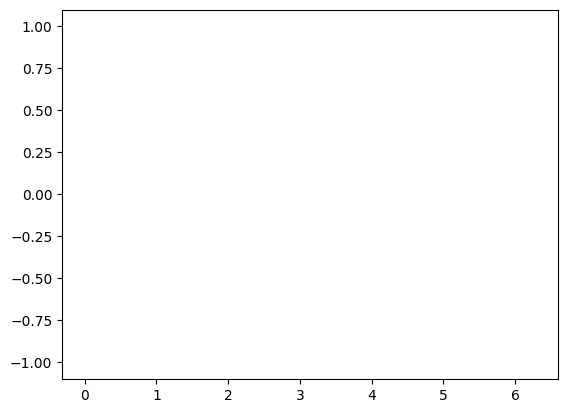

In [41]:
import matplotlib.pyplot as plt
import matplotlib.animation
from matplotlib import rc
import numpy as np

# equivalent to rcParams['animation.html'] = 'html5'
# This line sets the stage for animation.
rc('animation', html='html5')

# Use 50 animation steps based on previous example
steps = 250
x = np.zeros(steps)
y = np.zeros(steps)

vx = 0.5 # contsant velocity in x
vy = 0.5 # constant velocity in y
dt = 0.5 # time step

x_range = [0, 2*np.pi]
y_range = [-1, 1]

# Update positions using Euler's algorithm
for i in range(steps):
    # if x is out of bounds, reverse direction
    if (x[i-1] < x_range[0] or x[i-1] > x_range[1]):
        vx = -vx
    x[i] = x[i-1] + vx * dt

    # if y is out of bounds, reverse direction
    if (y[i-1] < y_range[0] or y[i-1] > y_range[1]):
        vy = -vy
    y[i] = y[i-1] - vy * dt

# Create a figure, fig of a simple axes running from -1 to 1 in y.
# Retain the axis handle, ax, and the plot handle, l
# for later use in creating the plot (axis handle) and
# manupulating contents (plot handle).
fig, ax = plt.subplots()
l, = ax.plot(x_range, y_range) # plot(x from 0 to 2pi and y from -1 to 1)

# This is the function that performs the animation. In this case all it does is
# move the coordinates of the point being plotted, while maintaining the history
# with the indexing [:i]
animate = lambda i: l.set_data(x[:i], y[:i])

# Create the animation object that includes the callback function animate, the figure handle fig
# and the number of frames to show.
# side effect - this creates an empty axes.
ani = matplotlib.animation.FuncAnimation(fig, animate, frames=steps);

# create the animation by 'displaying' the object
ani